In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import gender_guesser.detector as gender

In [2]:
df=pd.read_csv('archive/depression_data.csv')

In [3]:
# encode the categorical variables to numeric values so that correlations can be searched for
label_encoder = LabelEncoder()

# Dictionary to store the original labels for each column
original_labels = {}

# custom mappings for the non-binary categorical variables, makes sure they're in a sensible (e.g., ascending) order
category_mappings = {
    'Education Level': {
        'High School': 0,
        'Associate Degree': 1,
        "Bachelor's Degree": 2,
        "Master's Degree": 3,
        'PhD': 4
    },
    'Smoking Status': {
        'Non-smoker': 0,
        'Former': 1,
        'Current': 2
    },
    'Physical Activity Level': {
        'Sedentary': 2,
        'Moderate': 1,
        'Active': 0
    },
    'Alcohol Consumption': {
        'High': 2,
        'Moderate': 1,
        'Low': 0
    },
    'Dietary Habits': {
        'Healthy': 0,
        'Moderate': 1,
        'Unhealthy': 2
    },
    'Sleep Patterns': {
        'Good': 0,
        'Fair': 1,
        'Poor': 2
    }
}

# copy the dataframe for safety
df_encoded = df.copy()
df_encoded = df_encoded.drop(columns=['Name'])  # name is not useful so drop it

# apply the custom mappings to the relevant categorical column
for col, mapping in category_mappings.items():
    df_encoded[col] = df_encoded[col].map(mapping)

# binary categorical variables are not included in the mappings
for col in df_encoded.columns:
    if col not in category_mappings:
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

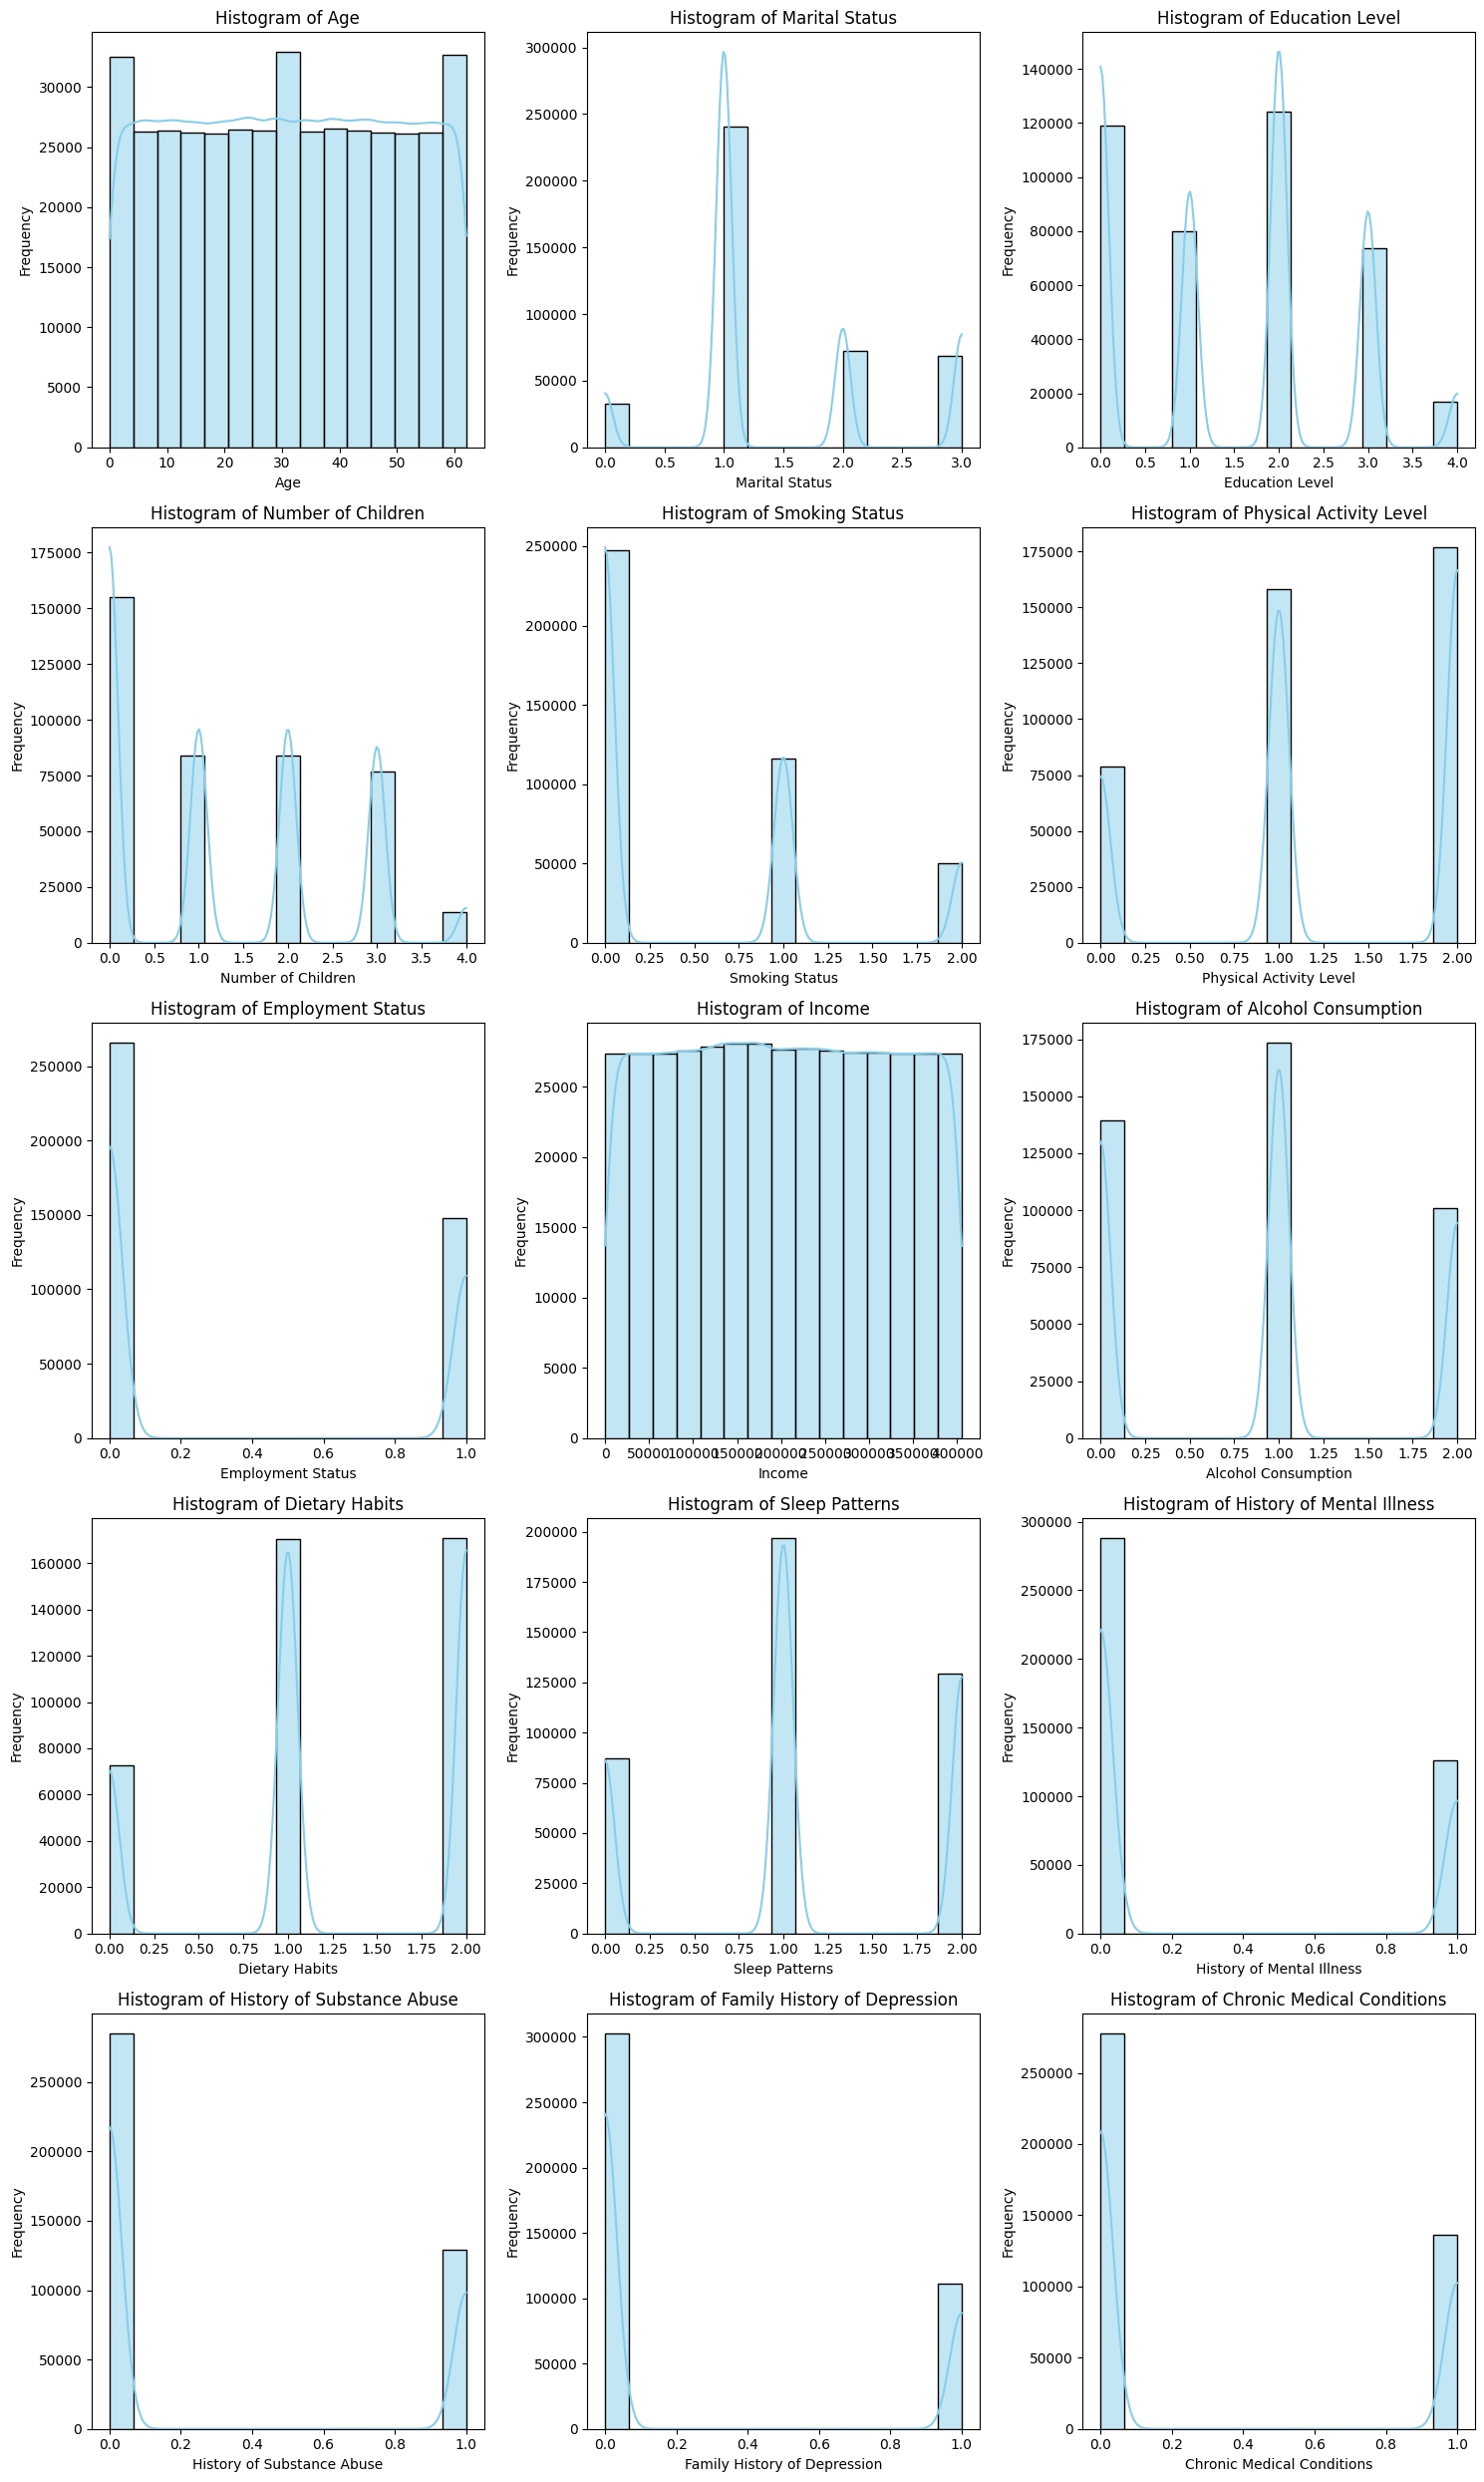

In [4]:
# make some diagnostic plots to explore the data
num_cols = len(df_encoded.select_dtypes(include='number').columns)  # number of columns
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # use 3 rows of figures
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

axes = axes.flatten()

# plot histograms for each variable
numerical_cols = df_encoded.select_dtypes(include='number').columns  # Select numerical columns
for i, col in enumerate(numerical_cols):
    sns.histplot(df_encoded[col], bins=15, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  
plt.show()

In [14]:
# drop non-numeric columns
df_numeric = df_encoded.select_dtypes(include=['number'])

# get the correlation matrix
correlation_matrix = df_numeric.corr()

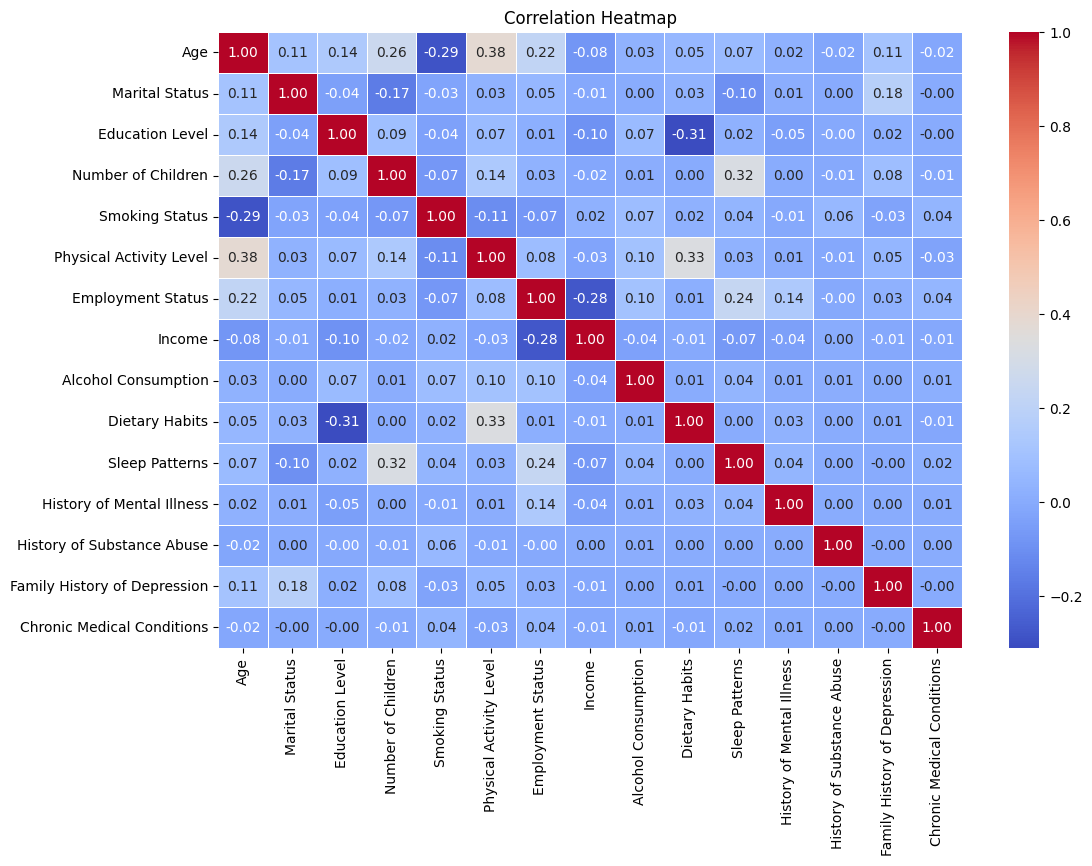

In [15]:
# plot correlation matrix
plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")

#plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')  # uncomment to save figure

plt.show()

Now I am going to repeat the analysis but with gender guessed from the name

In [7]:
# make a new dataframe for safety
df_guess_gender = df.copy()

In [8]:
# use gender detector to guess the gender from the names of the people in the sample
d = gender.Detector()

# the guesser uses the first name only, so take this from the Name column
df_guess_gender['First Name'] = df_guess_gender['Name'].apply(lambda x: x.split()[0])

# get the gender prediction from the name
df_guess_gender['Gender'] = df_guess_gender['First Name'].apply(lambda x: d.get_gender(x))

# drop the Name and first name columns
df_gender = df_guess_gender.drop(columns=['Name'])
df_gender = df_gender.drop(columns=['First Name'])

In [9]:
# filter the dataframe to include only rows where the gender is 'male' or 'female'
df_filtered_gender = df_gender[df_gender['Gender'].isin(['male', 'female'])]

In [10]:
# copying the data frame for safety
df_encoded_gender = df_filtered_gender.copy()

# encode the categorical data like before
for col, mapping in category_mappings.items():
    df_encoded_gender[col] = df_encoded_gender[col].map(mapping)

# like before, leaving binary categorical variables as they are
label_encoder = LabelEncoder()
for col in df_encoded_gender.columns:
    if col not in category_mappings:
        df_encoded_gender[col] = label_encoder.fit_transform(df_encoded_gender[col].astype(str))

In [11]:
# drop non-numeric columns
df_numeric_gender = df_encoded_gender.select_dtypes(include=['number'])

# get the correlation matrix
correlation_matrix = df_numeric_gender.corr()

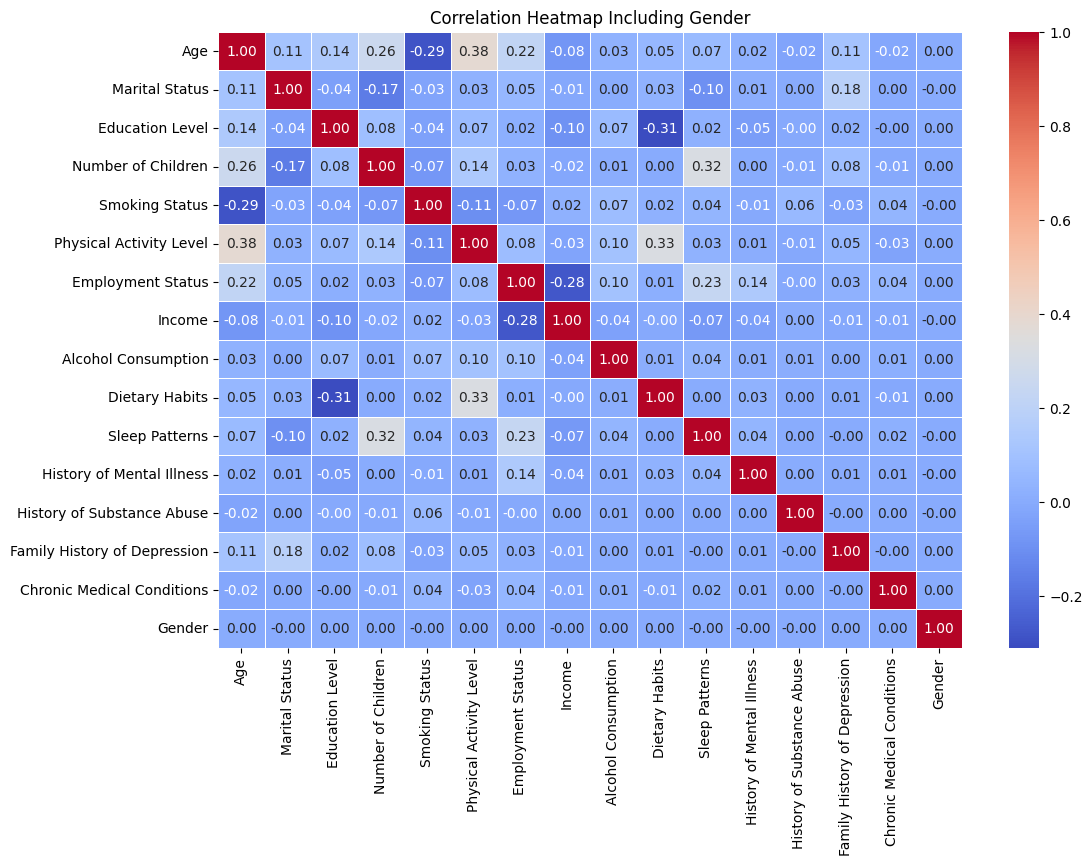

In [13]:
# heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap Including Gender")

#plt.savefig('correlation_heatmap_inc_gender.png', dpi=300, bbox_inches='tight')  # uncomment to save figure

plt.show()